In [ ]:
! pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=cbf55031ffbbdd921cdb44e9d622db712d617882fdac24f20b548fdfbe54b927
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


Enter service rating (0-10): 5
Enter food quality rating (0-10): 8
Tip percentage:  13.991792065663477 % 



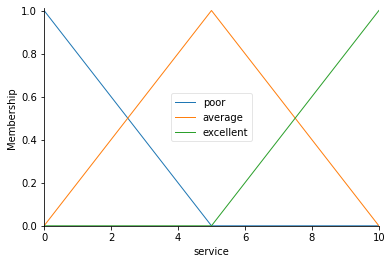

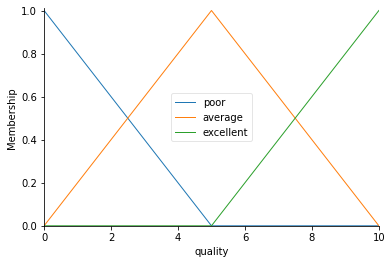

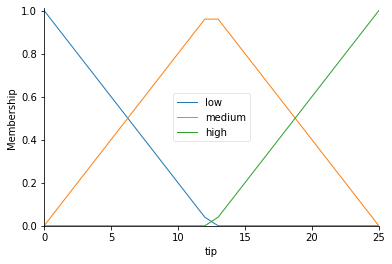

In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the input variables
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')

# Define the output variable
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Create the membership functions
service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['excellent'] = fuzz.trimf(service.universe, [5, 10, 10])

quality['poor'] = fuzz.trimf(quality.universe, [0, 0, 5])
quality['average'] = fuzz.trimf(quality.universe, [0, 5, 10])
quality['excellent'] = fuzz.trimf(quality.universe, [5, 10, 10])

tip['low'] = fuzz.trimf(tip.universe, [0, 0, 12.5])
tip['medium'] = fuzz.trimf(tip.universe, [0, 12.5, 25])
tip['high'] = fuzz.trimf(tip.universe, [12.5, 25, 25])

# Define the rules
rule1 = ctrl.Rule(service['poor'] | quality['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'] | quality['average'], tip['medium'])
rule3 = ctrl.Rule(service['excellent'] | quality['excellent'], tip['high'])

# Create the control system
tip_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tip_simulator = ctrl.ControlSystemSimulation(tip_ctrl)

# Prompt user for input values
s = input("Enter service rating (0-10): ")
q = input("Enter food quality rating (0-10): ")

# Convert input strings to floats
service_val = float(s)
quality_val = float(q)

# Run the simulation with user inputs
tip_simulator.input['service'] = service_val
tip_simulator.input['quality'] = quality_val

tip_simulator.compute()
print("Tip percentage: ", tip_simulator.output['tip'],"% \n")

# Plot the membership functions for service
service.view()

# Plot the membership functions for quality
quality.view()

# Plot the membership functions for tip
tip.view()

plt.show()
